# Handwritten Digit Recognition using Tensorflow

(Explanation to wthe number of hidden layers in the network)
In summary, adding more Dense layers can make the network more expressive
    and capable of learning complex patterns, but it requires careful
    consideration to avoid overfitting and achieve good generalization performance
    on new data.

(Explanation to why we use 128 neurons in the hidden layer)
In this specific example, using units=128 in the hidden layer is likely arbitrary
    and might not be optimal for recognizing handwritten digits. The choice of this
    value could have been made for simplicity, demonstration purposes, or as an
    initial starting point for experimentation.

(Explanation to line 35)
1. 'optimizer'
The optimizer parameter specifies the optimization algorithm used to update the
    model's weights during training. In this case, 'adam' refers to the Adam optimizer,
    which is a popular and effective optimization algorithm for training neural
    networks. Adam adapts the learning rate for each parameter during training, which
    can speed up convergence and improve training efficiency.

2. 'loss'
The loss parameter specifies the loss function used to measure how well the model's
    predictions match the actual target values during training. In the context of
    classification tasks with multiple classes (like recognizing digits),
    'sparse_categorical_crossentropy' is commonly used. This loss function calculates
    the cross-entropy between the true class labels and the predicted class probabilities.

3. 'metrics'
The metrics parameter specifies additional evaluation metrics that you want to monitor
    during training. In this case, 'accuracy' is used as the metric. It calculates the
    accuracy of the model's predictions by comparing them to the true target labels.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 28x28 images of hand-written digits 0-9
# being classified
mnist = tf.keras.datasets.mnist

# load_data() returns two tuples of training and testing data
# using a 70/30 split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the data, scale the data to be between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# we do not normalize the y data, because it is a classification
# y represents what x is, so we do not want to change the values

# build the model
model = tf.keras.models.Sequential() # fifo model

# Flatten() takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # input layer

# Dense() is a layer of neurons, 128 neurons, activation function is relu
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # hidden layer

# output layer, 10 neurons
# softmax for probability distribution meaning all the output values will add up to 1
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) # output layer

# explanation on the MarkDown
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# epochs is how many times the model will see the data over and over again
model.fit(x_train, y_train, epochs=3)

accuracy, loss = model.evaluate(x_test, y_test)
print('Accuracy: ', accuracy)
print('Loss: ', loss)

model.save('digits.model')

Epoch 1/3
1875/1875 [==============================] - 46s 21ms/step - loss: 0.2651 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1080 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.9712
Accuracy:  0.0915725901722908
Loss:  0.9711999893188477
INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


There's no problem with the training. Model is being trained on 1875 batches of 32 images
each, not 1875 images.

1875*32 = 60000 images

1/1 [==============================] - 0s 68ms/step
The result is probably: 7
These are the results: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


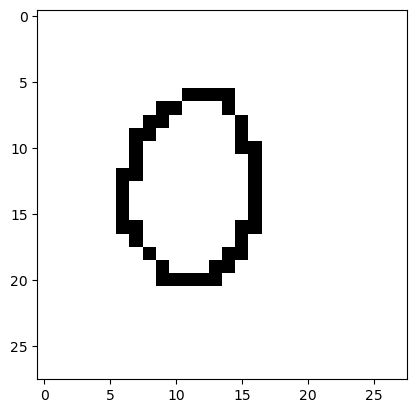

1/1 [==============================] - 0s 27ms/step
The result is probably: 8
These are the results: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


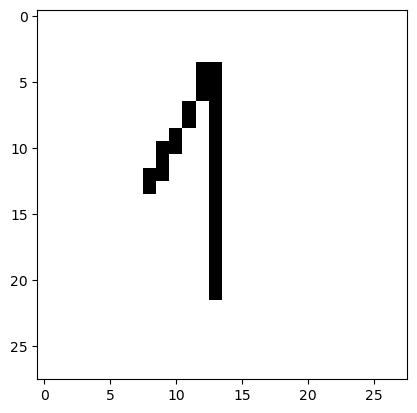

1/1 [==============================] - 0s 28ms/step
The result is probably: 2
These are the results: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


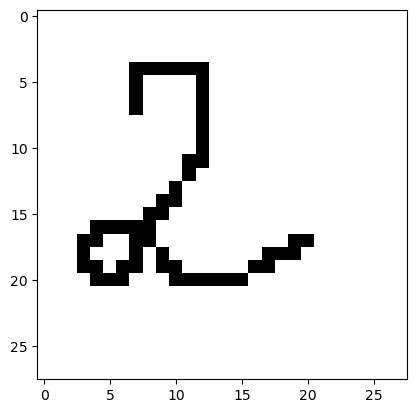

1/1 [==============================] - 0s 27ms/step
The result is probably: 3
These are the results: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


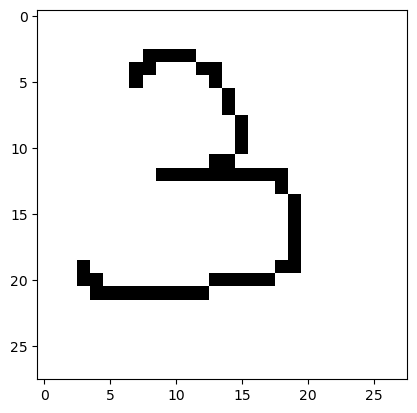

1/1 [==============================] - 0s 31ms/step
The result is probably: 4
These are the results: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


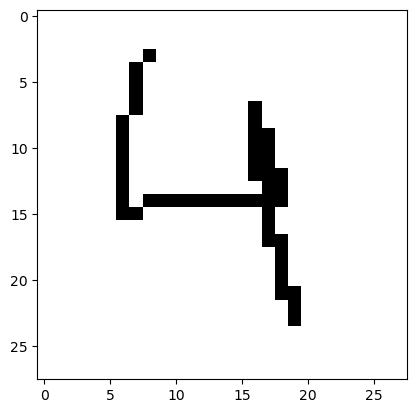

1/1 [==============================] - 0s 29ms/step
The result is probably: 3
These are the results: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


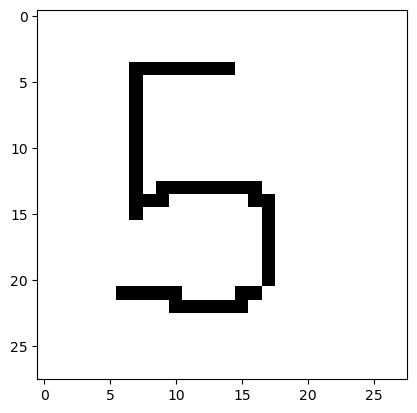

1/1 [==============================] - 0s 29ms/step
The result is probably: 8
These are the results: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


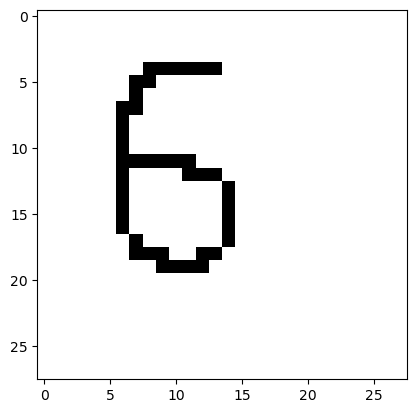

1/1 [==============================] - 0s 29ms/step
The result is probably: 7
These are the results: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


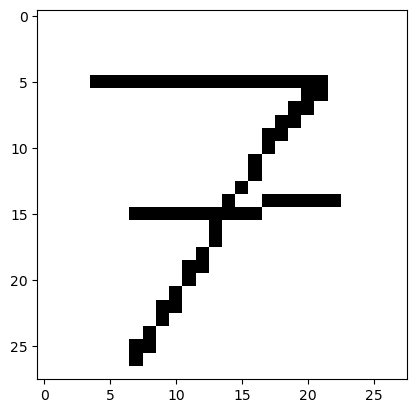

1/1 [==============================] - 0s 27ms/step
The result is probably: 3
These are the results: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


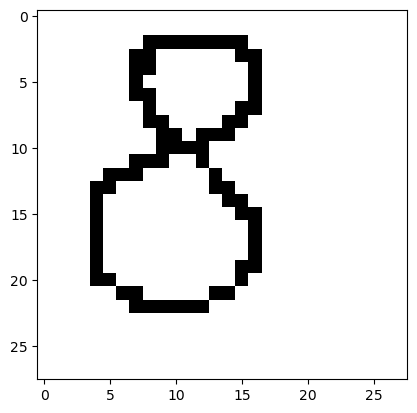

1/1 [==============================] - 0s 32ms/step
The result is probably: 3
These are the results: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


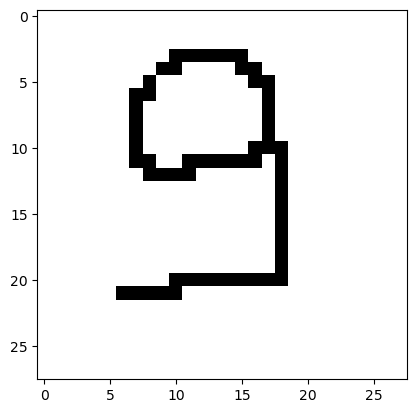

In [13]:
import cv2 as cv # used for image processing

# import an aleady trained model
model_imported = tf.keras.models.load_model('digits.model')


for x in range(0, 10):
    img = cv.imread(f'./my_data/{x}.png')[:,:,0]
    # invert the image so that the background is black and the number is white
    img = np.invert(np.array([img]))
    prediction = model_imported.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    print(f'These are the results: {prediction}')
    # plt.cm.binary is a black and white color scheme
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()